# This notebook includes:
### 1.Import libraries and Data
### 2.Security implications and addressing PII data
### 3.Regional segmentation
### 4.Exclusion of low-activity customer
### 5.Customer Profiling
### 6.Comparing customer profiles with departments
### 7.Comparing customer profiles with regions
### 8.Aggregating the max, mean, and min on a customer-profile level for usage frequency and expenditure

## 1.Import libraries and Data

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [2]:
# Create directory Path
path = r'C:\Users\luke_\Desktop\CF Datacourse\Python_exercise4\09-2024 Instacart Basket Analysis'

In [3]:
# Import data frame
instacart_data = pd.read_pickle(os.path.join(path, '02_data', 'prepared_data', 'ords_prods_custos_merged.pkl'))

In [4]:
instacart_data.shape

(32404859, 33)

In [5]:
instacart_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [6]:
instacart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   product_id               int64   
 1   product_name             object  
 2   aisle_id                 int64   
 3   department_id            int64   
 4   prices                   float64 
 5   order_id                 int64   
 6   user_id                  object  
 7   order_number             int64   
 8   order_day_of_week        int64   
 9   time_of_order            int64   
 10  days_since_prior_order   float64 
 11  add_to_cart_order        int64   
 12  reordered                int64   
 13  price_range_loc          object  
 14  Busiest_day              object  
 15  days_performance         object  
 16  busiest_period_of_day    object  
 17  max_order                int64   
 18  loyalty_flag             object  
 19  user_order_behaviour     float64 
 20  frequency_flag        

## 2.Security implications and addressing PII data

### PPI data or Personal Identifiable Information is sensitive information which can identify individuals within a dataset.
### This needs to be removed from the dataframe before results are handed off to anyone. First and last name are the most important here.
### We will drop these from our dataframe now.

In [7]:
# Dropping columns first_name and last_name
instacart_data = instacart_data.drop(columns=['first_name','last_name'])

In [8]:
#confirming columns were droped.
instacart_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,user_spending_behaviour,spending_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,6.935811,High Spender,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,6.935811,High Spender,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,7.930208,High Spender,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,4.972414,High Spender,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,4.972414,High Spender,Female,Wisconsin,40,2/9/2020,3,married,31308,both


## 3.Regional segmentation

### The Instacart officers are interested in comparing customer behavior in different geographic areas. 
### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [9]:
# Define regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'] 
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska','Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# Create a result list for the 'state' column  showing its corresponding region
result = []

for value in instacart_data['state']: 
    if value in northeast:
        result.append('northeast')
    elif value in midwest:
        result.append('midwest')
    elif value in south:
        result.append('south')
    elif value in west:
        result.append('west')
    else:
       result.append('No assigned region')

In [11]:
# Assigning result list as new column
instacart_data['region'] = result

In [12]:
# Confirming new column
instacart_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,spending_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,High Spender,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,High Spender,Male,Minnesota,81,8/1/2019,1,married,49620,both,midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,High Spender,Female,Vermont,66,6/16/2018,2,married,158302,both,northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,High Spender,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,High Spender,Female,Wisconsin,40,2/9/2020,3,married,31308,both,midwest


In [13]:
# crossing the region column with the spending flag
crosstab = pd.crosstab(instacart_data['region'], instacart_data['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
region,,
midwest,7441350,155975
northeast,5614511,108225
south,10582194,209691
west,8132559,160354


### This will be easier to visualise with a graph

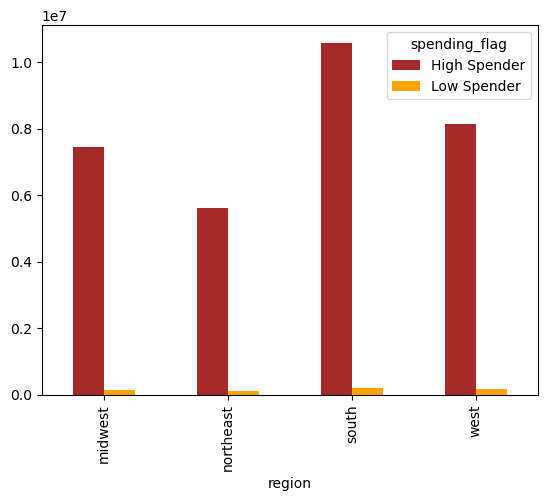

In [15]:
# create bar chart showing the difference in spending habits
regional_spending_bar = crosstab.plot.bar(color = ['brown', 'orange'])

### With the graph we see that with High Spenders, the North East is the weakest around 0.6 and the South is the strongest around 1.3. The west and Midwest are both around 0.8.
### The Low spenders, are similar across all regions.

In [16]:
# export bar graph
regional_spending_bar.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_regional_spending.png'))

## 4.Exclusion of low-activity customer

### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [17]:
# create function establishing low and high activity customers
result = []

for value in instacart_data['max_order']:
    if value < 5:
        result.append('low-activity customer')
    else: 
        result.append('high-activity customer')

In [18]:
#creating 'customer_activity' column
instacart_data['activity_level'] = result

In [19]:
instacart_data['activity_level'].value_counts()

activity_level
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [20]:
#creating dataframe excluding low activity customers
instacart_low_acti_cust_excluded = instacart_data[instacart_data['activity_level'] != 'low_activity_customer']

In [21]:
# export dataframe
instacart_low_acti_cust_excluded.to_pickle(os.path.join(path, '02_data', 'prepared_data', 'low_acti_excluded.pkl'))

## 5.Customer Profiling

### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [22]:
# Checking Descriptive statistics on relevant columns
instacart_low_acti_cust_excluded[['age', 'n_dependants', 'income']].describe()

,age,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,1.501896e+00,9.943773e+04
std,1.848558e+01,1.118865e+00,4.305727e+04
min,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.300000e+01,1.000000e+00,6.700400e+04
50%,4.900000e+01,2.000000e+00,9.661800e+04
75%,6.500000e+01,3.000000e+00,1.279120e+05
max,8.100000e+01,3.000000e+00,5.939010e+05


### The first step is to create age brackets, splitting customers into distinct categories to make analysis easier

In [23]:
# 'Young Adult' age group
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['age']<=25,'age_group']='Young Adult'

In [24]:
# 'Adult' age group
instacart_low_acti_cust_excluded.loc[(instacart_low_acti_cust_excluded['age']>=26) & (instacart_low_acti_cust_excluded['age']<=44),'age_group']='Adult'

In [25]:
# creating 'Middle-Aged' age group
instacart_low_acti_cust_excluded.loc[(instacart_low_acti_cust_excluded['age']>=45) & (instacart_low_acti_cust_excluded['age']<=64),'age_group']='Middle-Aged'

In [26]:
# creating 'Senior' age group
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['age']>=65,'age_group']='Senior'

In [27]:
instacart_low_acti_cust_excluded['age_group'].value_counts()

age_group
Middle-Aged    10139691
Adult           9644895
Senior          8575084
Young Adult     4045189
Name: count, dtype: int64

### Here we see that there are significantly fewer younger people using instacart than older adults.

In [28]:
age_category_values = instacart_low_acti_cust_excluded['age_group'].value_counts()

In [1]:
age_group_bar = age_category_values.plot.bar(color = ['red', 'orange', 'green', 'blue'])
plt.tight_layout()

NameError: name 'age_category_values' is not defined

In [30]:
# export bar graph
age_group_bar.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_age_category.png'))

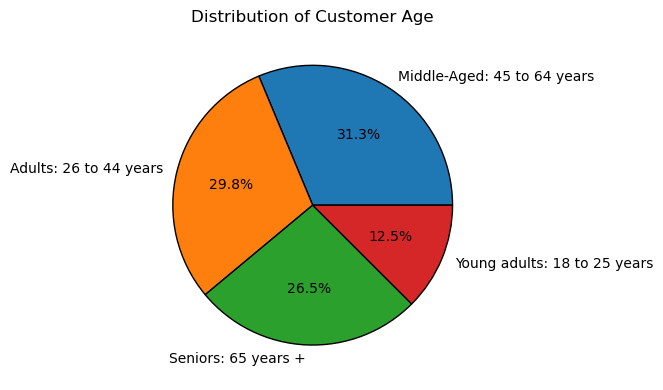

In [31]:
# Plot the pie chart
age_category_values.plot(figsize=(6, 4))
age_group_pie_chart =age_category_values.plot.pie(
    labels=['Middle-Aged: 45 to 64 years', 'Adults: 26 to 44 years','Seniors: 65 years +','Young adults: 18 to 25 years'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Customer Age')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [32]:
age_group_pie_chart.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'pie_age_category.png'))

### Customer Income Profiling

In [33]:
instacart_low_acti_cust_excluded['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

### Customer Income categories will be created to ease analysis

In [34]:
#'low income' category
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['income']<=67000,'income_group']='Low Income'

In [35]:
#'middle income' group
instacart_low_acti_cust_excluded.loc[(instacart_low_acti_cust_excluded['income']>67000) & (instacart_low_acti_cust_excluded['income']<=127000),'income_group']='Middle Income'

In [36]:
#'Upper income' category
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['income']>127000,'income_group']= 'High Income'

In [37]:
instacart_low_acti_cust_excluded['income_group'].value_counts()

income_group
Middle Income    16035151
High Income       8268909
Low Income        8100799
Name: count, dtype: int64

In [38]:
#creating a pie chart of Income group
income_group_categories = instacart_low_acti_cust_excluded['income_group'].value_counts()

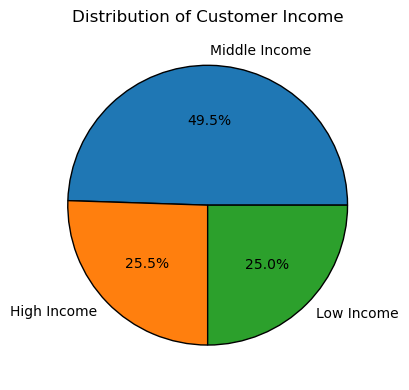

In [39]:
income_group_categories.plot(figsize=(6, 4))
income_category_pie =income_group_categories.plot.pie(
    labels=['Middle Income', 'High Income','Low Income'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Customer Income')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [40]:
income_category_pie.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'pie_income_category.png'))

### The Pie Chart shows clearly the distribution of customer incomes. Almost 50% of all customers fall in the middle income bracket. While high and low income customers are almost equal. Middle income customers should definatly recieve a significant amount of marketing attention.

## Customer dependents Profiling

In [41]:
instacart_low_acti_cust_excluded['n_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

### As all customers have between 0 and 3 dependants,we will categorise customers into four groups to ease analysis

In [42]:
# creating 'no dependents' group
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['n_dependants']==0,'dependants_category']='No Dependants'

In [43]:
# creating 'one dependent' group
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['n_dependants']==1,'dependants_category']='One Dependant'

In [44]:
# creating 'Two dependents' group
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['n_dependants']==2,'dependants_category']='Two Dependants'

In [45]:
# creating 'Three dependents' group
instacart_low_acti_cust_excluded.loc[instacart_low_acti_cust_excluded['n_dependants']==3,'dependants_category']='Three Dependants'

In [46]:
instacart_low_acti_cust_excluded['dependants_category'].value_counts()

dependants_category
Three Dependants    8135109
No Dependants       8097503
Two Dependants      8091143
One Dependant       8081104
Name: count, dtype: int64

In [47]:
#Create Bar chart
dependants_distribution = instacart_low_acti_cust_excluded['dependants_category'].value_counts()

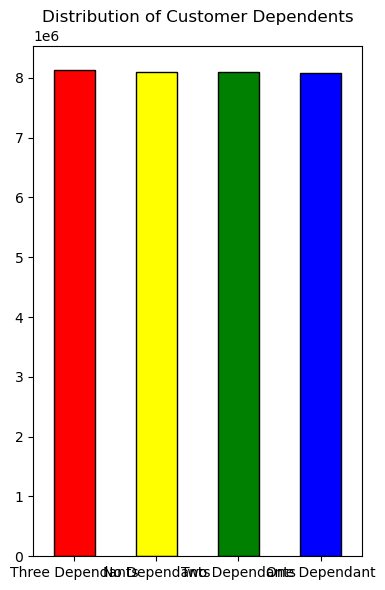

In [48]:
plt.figure(figsize=(4,6))
dependant_category_bar = dependants_distribution.plot.bar(color= ['red', 'yellow', 'green', 'blue'],edgecolor='black', rot=0)
plt.title('Distribution of Customer Dependents')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [49]:
dependant_category_bar.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_dependant_category.png'))

### The distribution of the dependants across the four categories are almost equal. There are a slight majority who have 3 dependants and customers with 1 dependant are in the minority.

## 'order_day_of_week' profiling

In [50]:
instacart_low_acti_cust_excluded['order_day_of_week'].describe()

count    3.240486e+07
mean     2.738867e+00
std      2.090077e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_day_of_week, dtype: float64

In [51]:
# For reading ease I will change the numbers representing days of the week to words
days_of_week = {0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}

In [52]:
ords_dow = instacart_low_acti_cust_excluded['order_day_of_week'].value_counts()

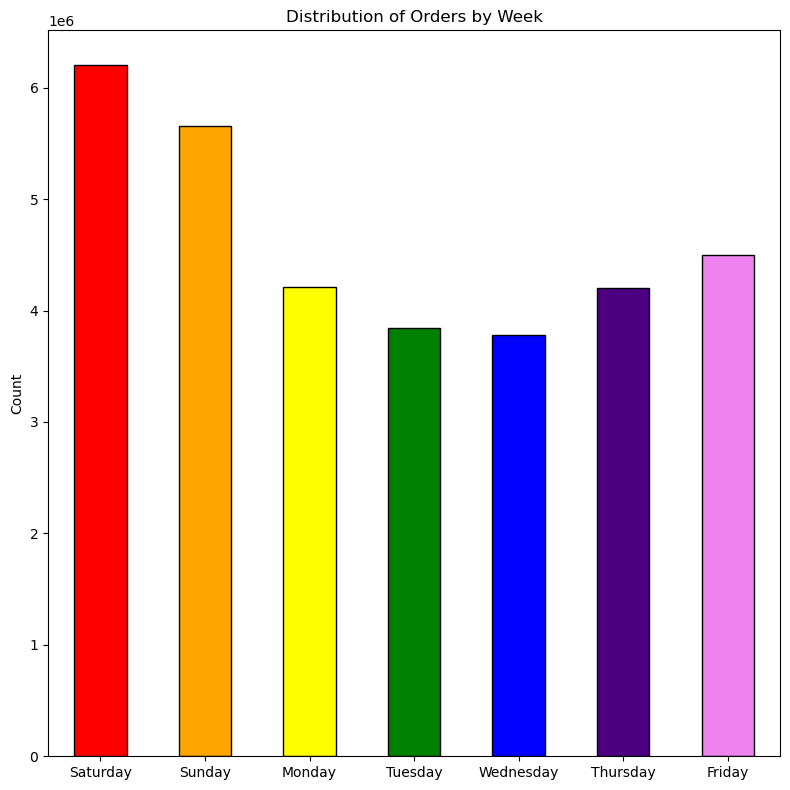

In [53]:
plt.figure(figsize=(8, 8))
orders_distribution_bar = ords_dow.sort_index().plot.bar(color = ['red','orange','yellow','green','blue','indigo','violet'],edgecolor='black', rot=0)
plt.title('Distribution of Orders by Week')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[days_of_week[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [54]:
orders_distribution_bar.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_dow_order_distribution.png'))

## profiling of hour of day

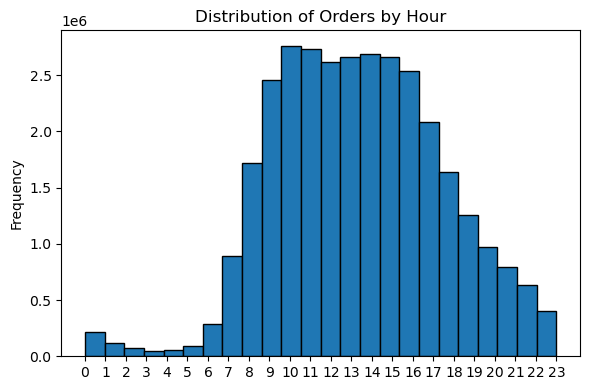

In [55]:
plt.figure(figsize=(6, 4))
histo_orders_by_hour = instacart_low_acti_cust_excluded['time_of_order'].plot.hist(bins=24, edgecolor='black')
plt.title('Distribution of Orders by Hour')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [56]:
histo_orders_by_hour.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'histo_orders_by_hour.png'))

## Profiling based on marriage status

In [57]:
instacart_low_acti_cust_excluded['fam_status'].value_counts()

fam_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [58]:
mar_status = instacart_low_acti_cust_excluded['fam_status'].value_counts()

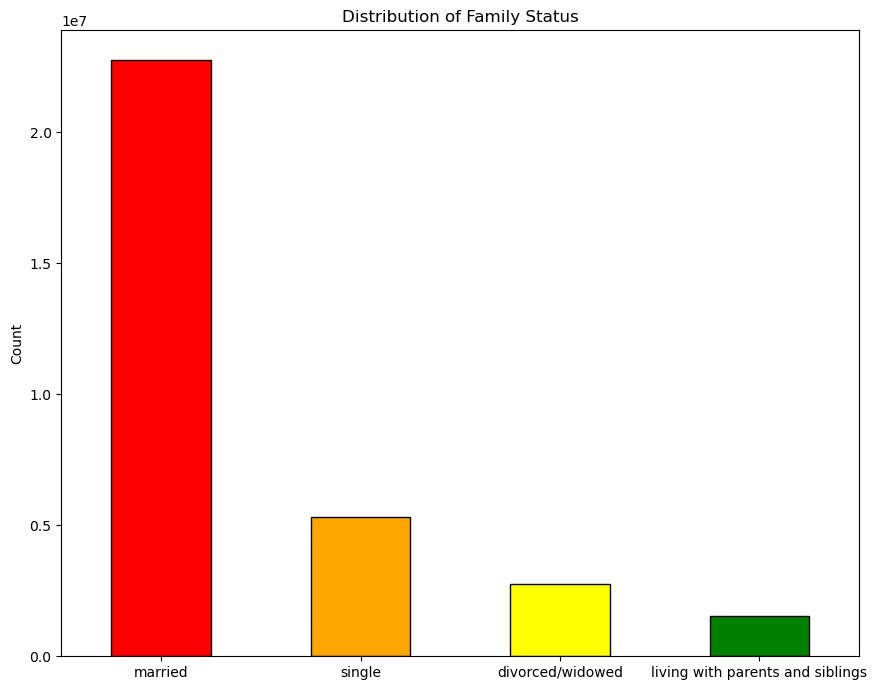

In [59]:
plt.figure(figsize=(9, 7))
fam_status_distrib_bar = mar_status.plot.bar(color = ['red','orange','yellow','green'],edgecolor='black', rot=0)
plt.title('Distribution of Family Status')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [60]:
fam_status_distrib_bar.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_fam_status_distribution.png'))

### The majority of customers are married. A Pie chart would also be appropriate for this data

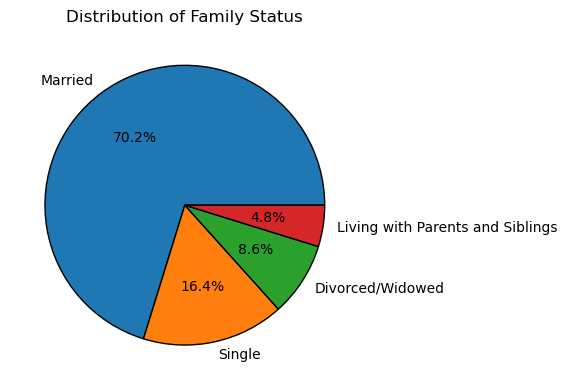

In [61]:
mar_status.plot(figsize=(6, 4))
family_status_pie = mar_status.plot.pie(
    labels=['Married', 'Single','Divorced/Widowed','Living with Parents and Siblings'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Family Status')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [62]:
family_status_pie.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'pie_fam_status_distribution.png'))

## Profiling based on Instacart Product Departments

In [63]:
# Department names are not in this Dataframe. I will have to import them and do another merge. As this was frustrating me using the original CSV, I adjusted the data to make importing easier.
df_deps = pd.read_csv(os.path.join(path, '02_data', 'original_data', 'departments_new.csv'), index_col = False)

In [64]:
df_deps

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [67]:
# Turning department dataframe into data dictionary
zipped = zip (df_deps['department_id'], df_deps['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [68]:
# Connect department names to department_id in dataframe

instacart_low_acti_cust_excluded.loc[:, 'department'] = instacart_low_acti_cust_excluded['department_id'].map(data_dict)

In [70]:
instacart_low_acti_cust_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,n_dependants,fam_status,income,_merge,region,activity_level,age_group,income_group,dependants_category,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,midwest,high-activity customer,Senior,Low Income,One Dependant,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,midwest,high-activity customer,Senior,Low Income,One Dependant,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,both,northeast,high-activity customer,Senior,High Income,Two Dependants,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,3,married,31308,both,midwest,low-activity customer,Adult,Low Income,Three Dependants,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,3,married,31308,both,midwest,low-activity customer,Adult,Low Income,Three Dependants,snacks


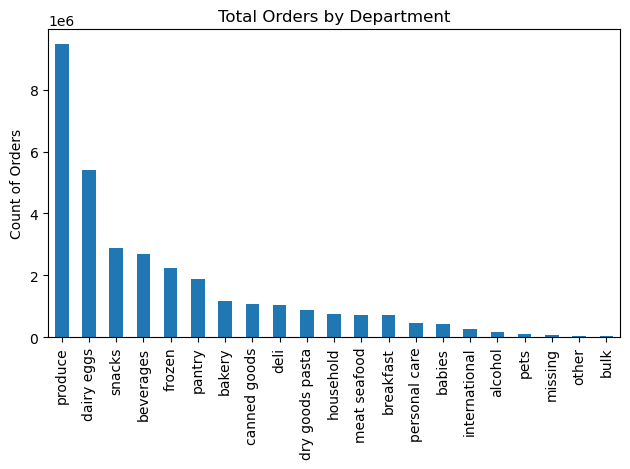

In [71]:
# Create bar chart of department orders
department_bar = instacart_low_acti_cust_excluded['department'].value_counts().plot.bar(color='tab:blue')
plt.title('Total Orders by Department')
plt.tight_layout()
plt.xlabel('')
plt.ylabel('Count of Orders')
plt.tight_layout() 

In [80]:
department_bar.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'depart_distribution_bar.png'))

### we see by the order count which departments are more popular than others. Produce is far ahead of the other departments, followed by dairy and eggs. With further analysis we can see which customers buy from which departments.

## 6.Comparing customer profiles with regions

In [74]:
crosstab_age_group = pd.crosstab(instacart_low_acti_cust_excluded['department'], instacart_low_acti_cust_excluded['age_group'], dropna = False)

In [75]:
crosstab_age_group

age_group,Adult,Middle-Aged,Senior,Young Adult
department,,,,
alcohol,44890,49359,39036,20411
babies,127238,134108,109445,53011
bakery,349788,366692,309522,146426
beverages,789244,850960,714832,333087
breakfast,208477,221198,183844,89514
bulk,10271,10638,9242,4422
canned goods,319096,333034,282438,133490
dairy eggs,1615921,1681753,1426213,674860
deli,313917,329214,277618,130500


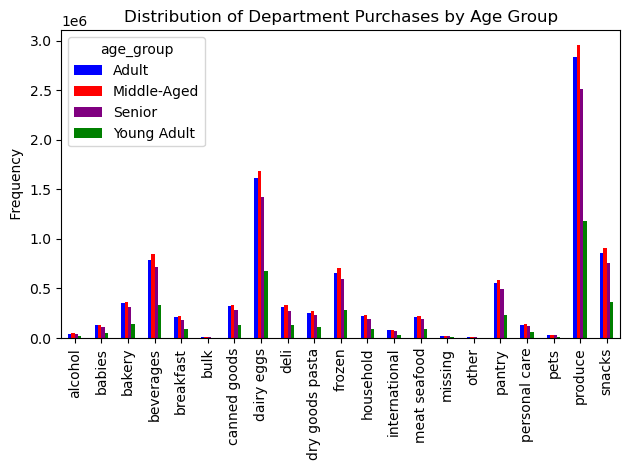

In [79]:
# Create a bar chart of the above crosstab_age_group
bar_crosstab_age_group = crosstab_age_group.plot.bar(color=['blue', 'red', 'purple', 'green'])
plt.xlabel("")
plt.ylabel(" Frequency ")
plt.title("Distribution of Department Purchases by Age Group")
plt.tight_layout() 

### The graph shows that the ratio between the foup age groups stays consistant across all departments. Middle aged customers are the best customers, followed by adults, seniors and young adults.

In [81]:
bar_crosstab_age_group.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_dept_age_group_distribution.png'))

In [83]:
crosstab_region = pd.crosstab(instacart_low_acti_cust_excluded['department'], instacart_low_acti_cust_excluded['region'], dropna = False)

In [84]:
crosstab_region

region,midwest,northeast,south,west
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


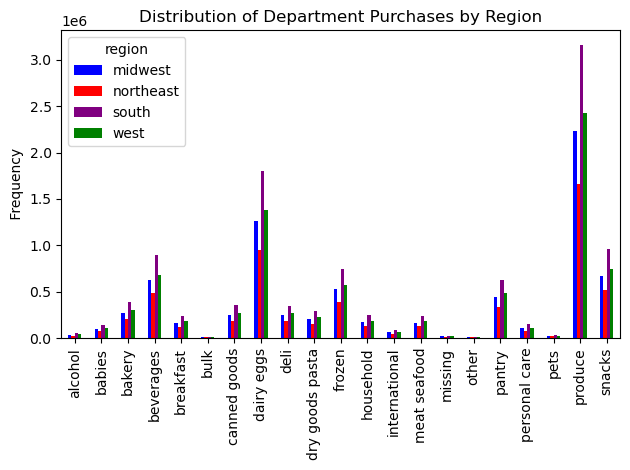

In [85]:
# Create a bar chart of the above crosstab_region
bar_crosstab_region = crosstab_region.plot.bar(color=['blue', 'red', 'purple', 'green'])
plt.xlabel("")
plt.ylabel(" Frequency ")
plt.title("Distribution of Department Purchases by Region")
plt.tight_layout() 

### The graph shows that the ratio between the foup geographical regions stays consistant across all departments. Southern customers are the best, followed by the West, Mid West and North East adults.

In [86]:
bar_crosstab_region.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_dept_regional_distribution.png'))

## 7.Comparing customer profiles with departments

In [95]:
crosstab_fam_status = pd.crosstab(instacart_low_acti_cust_excluded['department'], instacart_low_acti_cust_excluded['fam_status'], dropna = False)

In [96]:
crosstab_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461911,260787,3788598,887451
deli,90818,50415,735689,174327


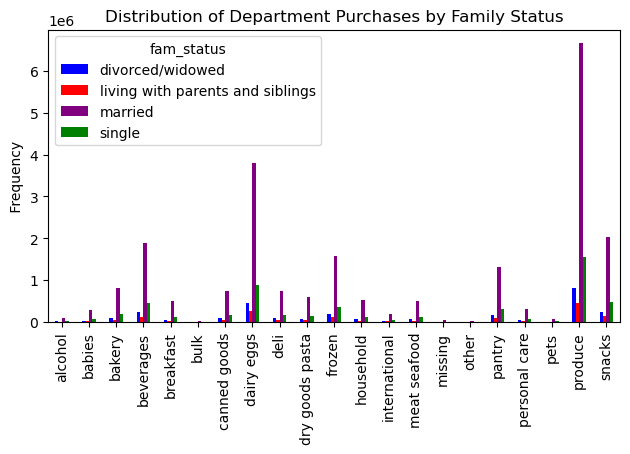

In [97]:
# Create a bar chart of the above crosstab_busy_day
bar_crosstab_fam_status = crosstab_fam_status.plot.bar(color=['blue', 'red', 'purple', 'green'])
plt.xlabel("")
plt.ylabel(" Frequency ")
plt.title("Distribution of Department Purchases by Family Status")
plt.tight_layout() 

### The graph does not show any variation between departments with regards to family status. The strongest purchasing power comes from married customers across all departments.

In [99]:
bar_crosstab_fam_status.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_dept_fam_status.png'))

### family status/ income analysis

In [104]:
crosstab_fam_status_income = pd.crosstab(instacart_low_acti_cust_excluded['income_group'], instacart_low_acti_cust_excluded['fam_status'], dropna = False)

In [105]:
crosstab_fam_status_income

fam_status,divorced/widowed,living with parents and siblings,married,single
income_group,,,,
High Income,1084077,17948,6170213,996671
Low Income,352814,693454,5385504,1669027
Middle Income,1334921,839201,11201036,2659993


TypeError: 'Text' object is not callable

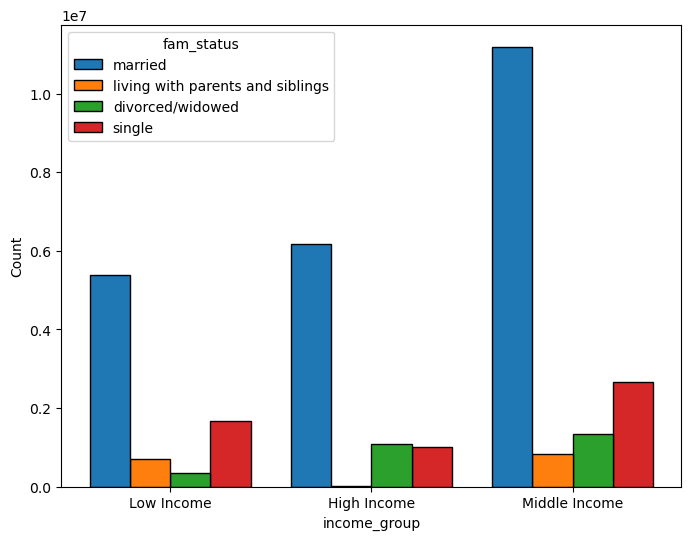

In [106]:
 # Plot the histogram bars
 plt = sns.histplot(data=instacart_low_acti_cust_excluded, x='income_group', hue='fam_status', multiple='dodge', shrink=.8, alpha=1)
 plt.title('Distribution of Customer Income groups by Fam Status')
 plt.ylabel('No. of Customers')
 plt.xlabel('Region')

In [107]:
plt.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'hist_income_fam_status.png'))

### Family Status/Age analysis

In [108]:
crosstab_fam_status_age = pd.crosstab(instacart_low_acti_cust_excluded['age_group'], instacart_low_acti_cust_excluded['fam_status'], dropna = False)

In [109]:
crosstab_fam_status_age

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adult,0,0,7227993,2416902
Middle-Aged,651728,0,7576723,1911240
Senior,2120084,0,6455000,0
Young Adult,0,1550603,1497037,997549


AttributeError: 'Axes' object has no attribute 'xlabel'

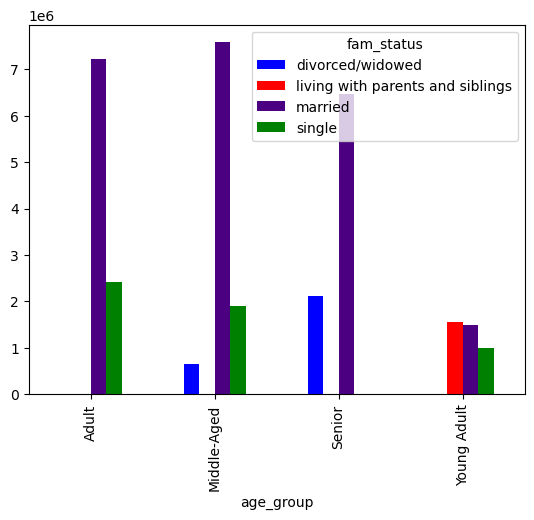

In [116]:
# Create a bar chart of the above crosstab_busy_day
bar_crosstab_fam_status_age = crosstab_fam_status_age.plot.bar(color=['blue', 'red', 'indigo', 'green'])
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Family Status by Age Group')
plt.tight_layout() 

### From this graph we see that there are significant differences between the age groups with regards to their family statuses. Young adults are the only group living with parents and siblings. Seniors are the only group that are not single, though they have the largest group of divorced or widowed.

In [117]:
bar_crosstab_fam_status_age.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_fam_status_age.png'))

## 8.Aggregating the max, mean, and min on a customer-profile level for usage frequency and expenditure

### The frequency of usage frequency will be evaluated by examining the number of days since the previous order, while spending patterns will be assessed using price data. 

In [118]:
# max, min, mean by age column
aggregating_by_age = instacart_low_acti_cust_excluded.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [119]:
aggregating_by_age

days_since_prior_order                  prices                    
                               min       mean   max    min       mean      max
age_group                                                                     
Adult                          0.0  11.113359  30.0    1.0  11.849466  99999.0
Middle-Aged                    0.0  11.121171  30.0    1.0  12.205612  99999.0
Senior                         0.0  11.078641  30.0    1.0  11.768850  99999.0
Young Adult                    0.0  11.093030  30.0    1.0  12.175118  99999.0

In [121]:
# max, min, mean by fam status column
aggregating_by_fam_status = instacart_low_acti_cust_excluded.groupby('fam_status').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [122]:
aggregating_by_fam_status

days_since_prior_order                   \
                                                    min       mean   max   
fam_status                                                                 
divorced/widowed                                    0.0  11.047780  30.0   
living with parents and siblings                    0.0  11.048170  30.0   
married                                             0.0  11.116175  30.0   
single                                              0.0  11.097992  30.0   

                                 prices                      
                                    min       mean      max  
fam_status                                                   
divorced/widowed                    1.0  11.453674  99999.0  
living with parents and siblings    1.0  10.828768  99999.0  
married                             1.0  12.005659  99999.0  
single                              1.0  12.480849  99999.0

In [124]:
# max, min, mean by dependants column
aggregating_by_dependants = instacart_low_acti_cust_excluded.groupby('n_dependants').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [125]:
aggregating_by_dependants

days_since_prior_order                  prices             \
                                min       mean   max    min       mean   
n_dependants                                                             
0                               0.0  11.080805  30.0    1.0  12.129243   
1                               0.0  11.100028  30.0    1.0  11.629316   
2                               0.0  11.125757  30.0    1.0  12.369543   
3                               0.0  11.109714  30.0    1.0  11.793264   

                       
                  max  
n_dependants           
0             99999.0  
1             99999.0  
2             99999.0  
3             99999.0